<a href="https://colab.research.google.com/github/Smith-S-S/pytorch_tuto/blob/main/unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

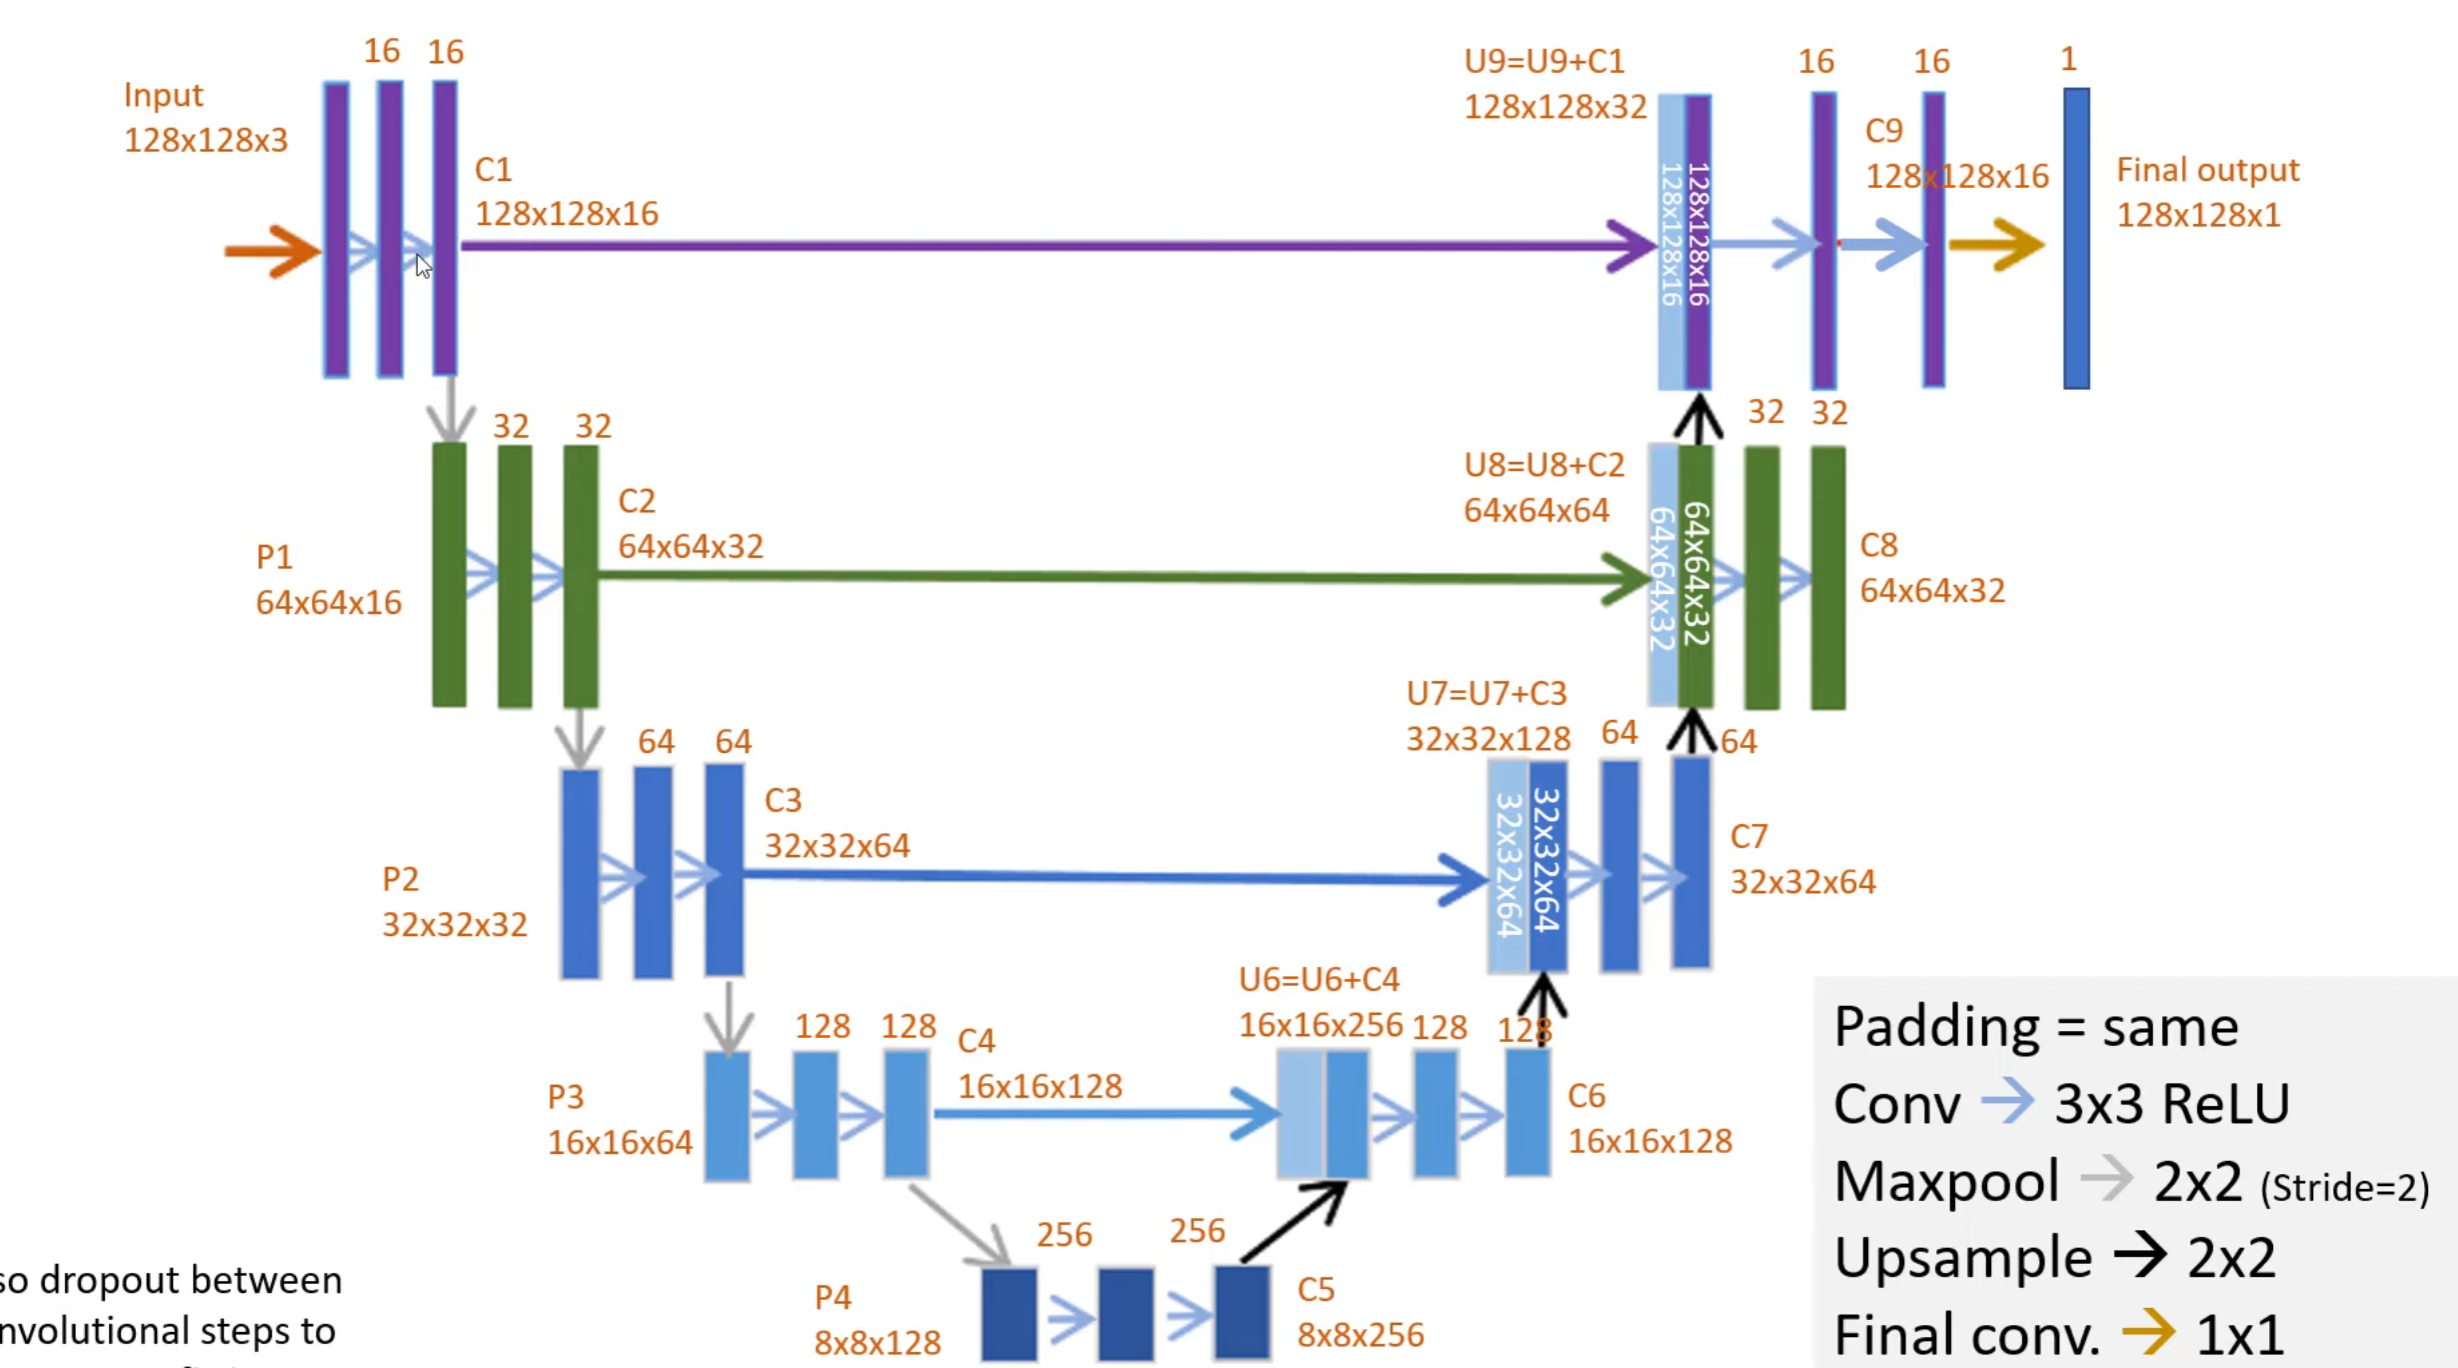

In [10]:
import tensorflow as tf


In [11]:
img_w = 128
img_h = 128
channel = 3

# unet
inputs = tf.keras.layers.Input((img_w, img_h, channel))
s = tf.keras.layers.Lambda(lambda x: x/255)(inputs)

# Encoding path
c1 = tf.keras.layers.Conv2D(16,3,activation="relu",kernel_initializer="he_normal",padding="same")(s)
# [16 layers, filters: 3x3]
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16,3,activation="relu",kernel_initializer="he_normal",padding="same")(c1)
p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)

c2 = tf.keras.layers.Conv2D(32,3,activation="relu",kernel_initializer="he_normal",padding="same")(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32,3,activation="relu",kernel_initializer="he_normal",padding="same")(c2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

c3 = tf.keras.layers.Conv2D(64,3,activation="relu",kernel_initializer="he_normal",padding="same")(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64,3,activation="relu",kernel_initializer="he_normal",padding="same")(c3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

c4 = tf.keras.layers.Conv2D(128,3,activation="relu",kernel_initializer="he_normal",padding="same")(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128,3,activation="relu",kernel_initializer="he_normal",padding="same")(c4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)

c5 = tf.keras.layers.Conv2D(256,3,activation="relu",kernel_initializer="he_normal",padding="same")(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256,3,activation="relu",kernel_initializer="he_normal",padding="same")(c5)

# Decoding path
# here we reduce the layes from 256 --> 3 and increase the H x W from 8 --> 128
u6 = tf.keras.layers.Conv2DTranspose(128,2,strides=(2,2),padding="same")(c5)
u6 = tf.keras.layers.concatenate([u6,c4])
c6 = tf.keras.layers.Conv2D(128,3,activation="relu",kernel_initializer="he_normal",padding="same")(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128,3,activation="relu",kernel_initializer="he_normal",padding="same")(c6)

u7 = tf.keras.layers.Conv2DTranspose(64,2,strides=(2,2),padding="same")(c6)
u7 = tf.keras.layers.concatenate([u7,c3])
c7 = tf.keras.layers.Conv2D(64,3,activation="relu",kernel_initializer="he_normal",padding="same")(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64,3,activation="relu",kernel_initializer="he_normal",padding="same")(c7)

u8 = tf.keras.layers.Conv2DTranspose(32,2,strides=(2,2),padding="same")(c7)
u8 = tf.keras.layers.concatenate([u8,c2])
c8 = tf.keras.layers.Conv2D(32,3,activation="relu",kernel_initializer="he_normal",padding="same")(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32,3,activation="relu",kernel_initializer="he_normal",padding="same")(c8)

c9 = tf.keras.layers.Conv2D(16,3,activation="relu",kernel_initializer="he_normal",padding="same")(c8)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16,3,activation="relu",kernel_initializer="he_normal",padding="same")(c9)

outputs = tf.keras.layers.Conv2D(1,1,padding="same",activation="sigmoid")(c9)

model = tf.keras.Model(inputs=[inputs],outputs=[outputs])
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_5 (Lambda)         │ (None, 128, 128, 3)    │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_25 (Conv2D)        │ (None, 128, 128, 16)   │            448 │ lambda_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_12 (Dropout)      │ (None, 128, 128, 16)   │              0 │ conv2d_25[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_26 (Conv2D)        │ (None, 128, 128, 16)   │          2,320 │ dropout_12[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 64, 64, 16)     │              0 │ conv2d_26[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_27 (Conv2D)        │ (None, 64, 64, 32)     │          4,640 │ max_pooling2d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_13 (Dropout)      │ (None, 64, 64, 32)     │              0 │ conv2d_27[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_28 (Conv2D)        │ (None, 64, 64, 32)     │          9,248 │ dropout_13[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 32, 32, 32)     │              0 │ conv2d_28[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_29 (Conv2D)        │ (None, 32, 32, 64)     │         18,496 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_14 (Dropout)      │ (None, 32, 32, 64)     │              0 │ conv2d_29[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_30 (Conv2D)        │ (None, 32, 32, 64)     │         36,928 │ dropout_14[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 16, 16, 64)     │              0 │ conv2d_30[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_31 (Conv2D)        │ (None, 16, 16, 128)    │         73,856 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_15 (Dropout)      │ (None, 16, 16, 128)    │              0 │ conv2d_31[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_32 (Conv2D)        │ (None, 16, 16, 128)    │        147,584 │ dropout_15[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8      

 Total params: 1,939,041 (7.40 MB)

 Trainable params: 1,939,041 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# giving data to the model

# 1st model checkpointer

moddel_checkpointer = tf.keras.callbacks.ModelCheckpoint('model_save.h5', verbose= True, save_best_only=True)
call_backs = [tf.keras.callbacks.EarlyStopping(patience= 2, monitor= "val_loss"),tf.keras.callbacks.TensorBoard(log_dir="logs")]


result = model.fit(X,Y,validation_split=0.1,epochs=25, batch_size= 16, callbacks=call_backs)